# ASINA test set

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os

In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [5]:
from pycaret.regression import *

In [15]:
import functions as f

### Define dataset columns

In [7]:
df_columns = ['NP_type', 'Coating','core_size_nm','hydro_size_nm','Surf_charge_mV','Surface_area_m2_g',
               'shape','Dose_microg_mL','Duration_h','Cell_name','Cell_species','cell_Organ','Cell_morphology',
               'Cell_age','cell_type','sex','Assay','Test_indicator','Viability']

### Loading the ASINA test data into the data frame.

In [10]:
tdf = pd.read_csv("input/test_set_asina.txt", sep="\t", encoding="unicode_escape", usecols=df_columns)

In [11]:
data_asina_test_df = f.canonicalize_dataset(tdf)

Does numeric columns have float64 pandas type? 

Duration_h: True
core_size_nm: True
hydro_size_nm: True
Surf_charge_mV: True
Surface_area_m2_g: True
Dose_microg_mL: True
Duration_h: True
Viability: True

Final column types: 

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

NP types that fall into the 'other' group:
['Ag']


In [12]:
data_asina_test_df.shape

(969, 20)

In [13]:
data_asina_test_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
0,Ag,None,150.0,144.04,NaN,NaN,Sphere,1.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,80.15
1,Ag,None,150.0,145.09,NaN,NaN,Sphere,5.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,65.05
2,Ag,None,150.0,146.40,NaN,NaN,Sphere,10.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,64.27
3,Ag,None,150.0,149.02,NaN,NaN,Sphere,20.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,57.01
4,Ag,None,150.0,154.27,NaN,NaN,Sphere,40.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,35.84


In [17]:
data_train_df = pd.read_csv("output/datasets/universal/data_regression_train_df.csv", encoding="utf-8")

### Plot numerical variables distribution of train and ASINA test sets 

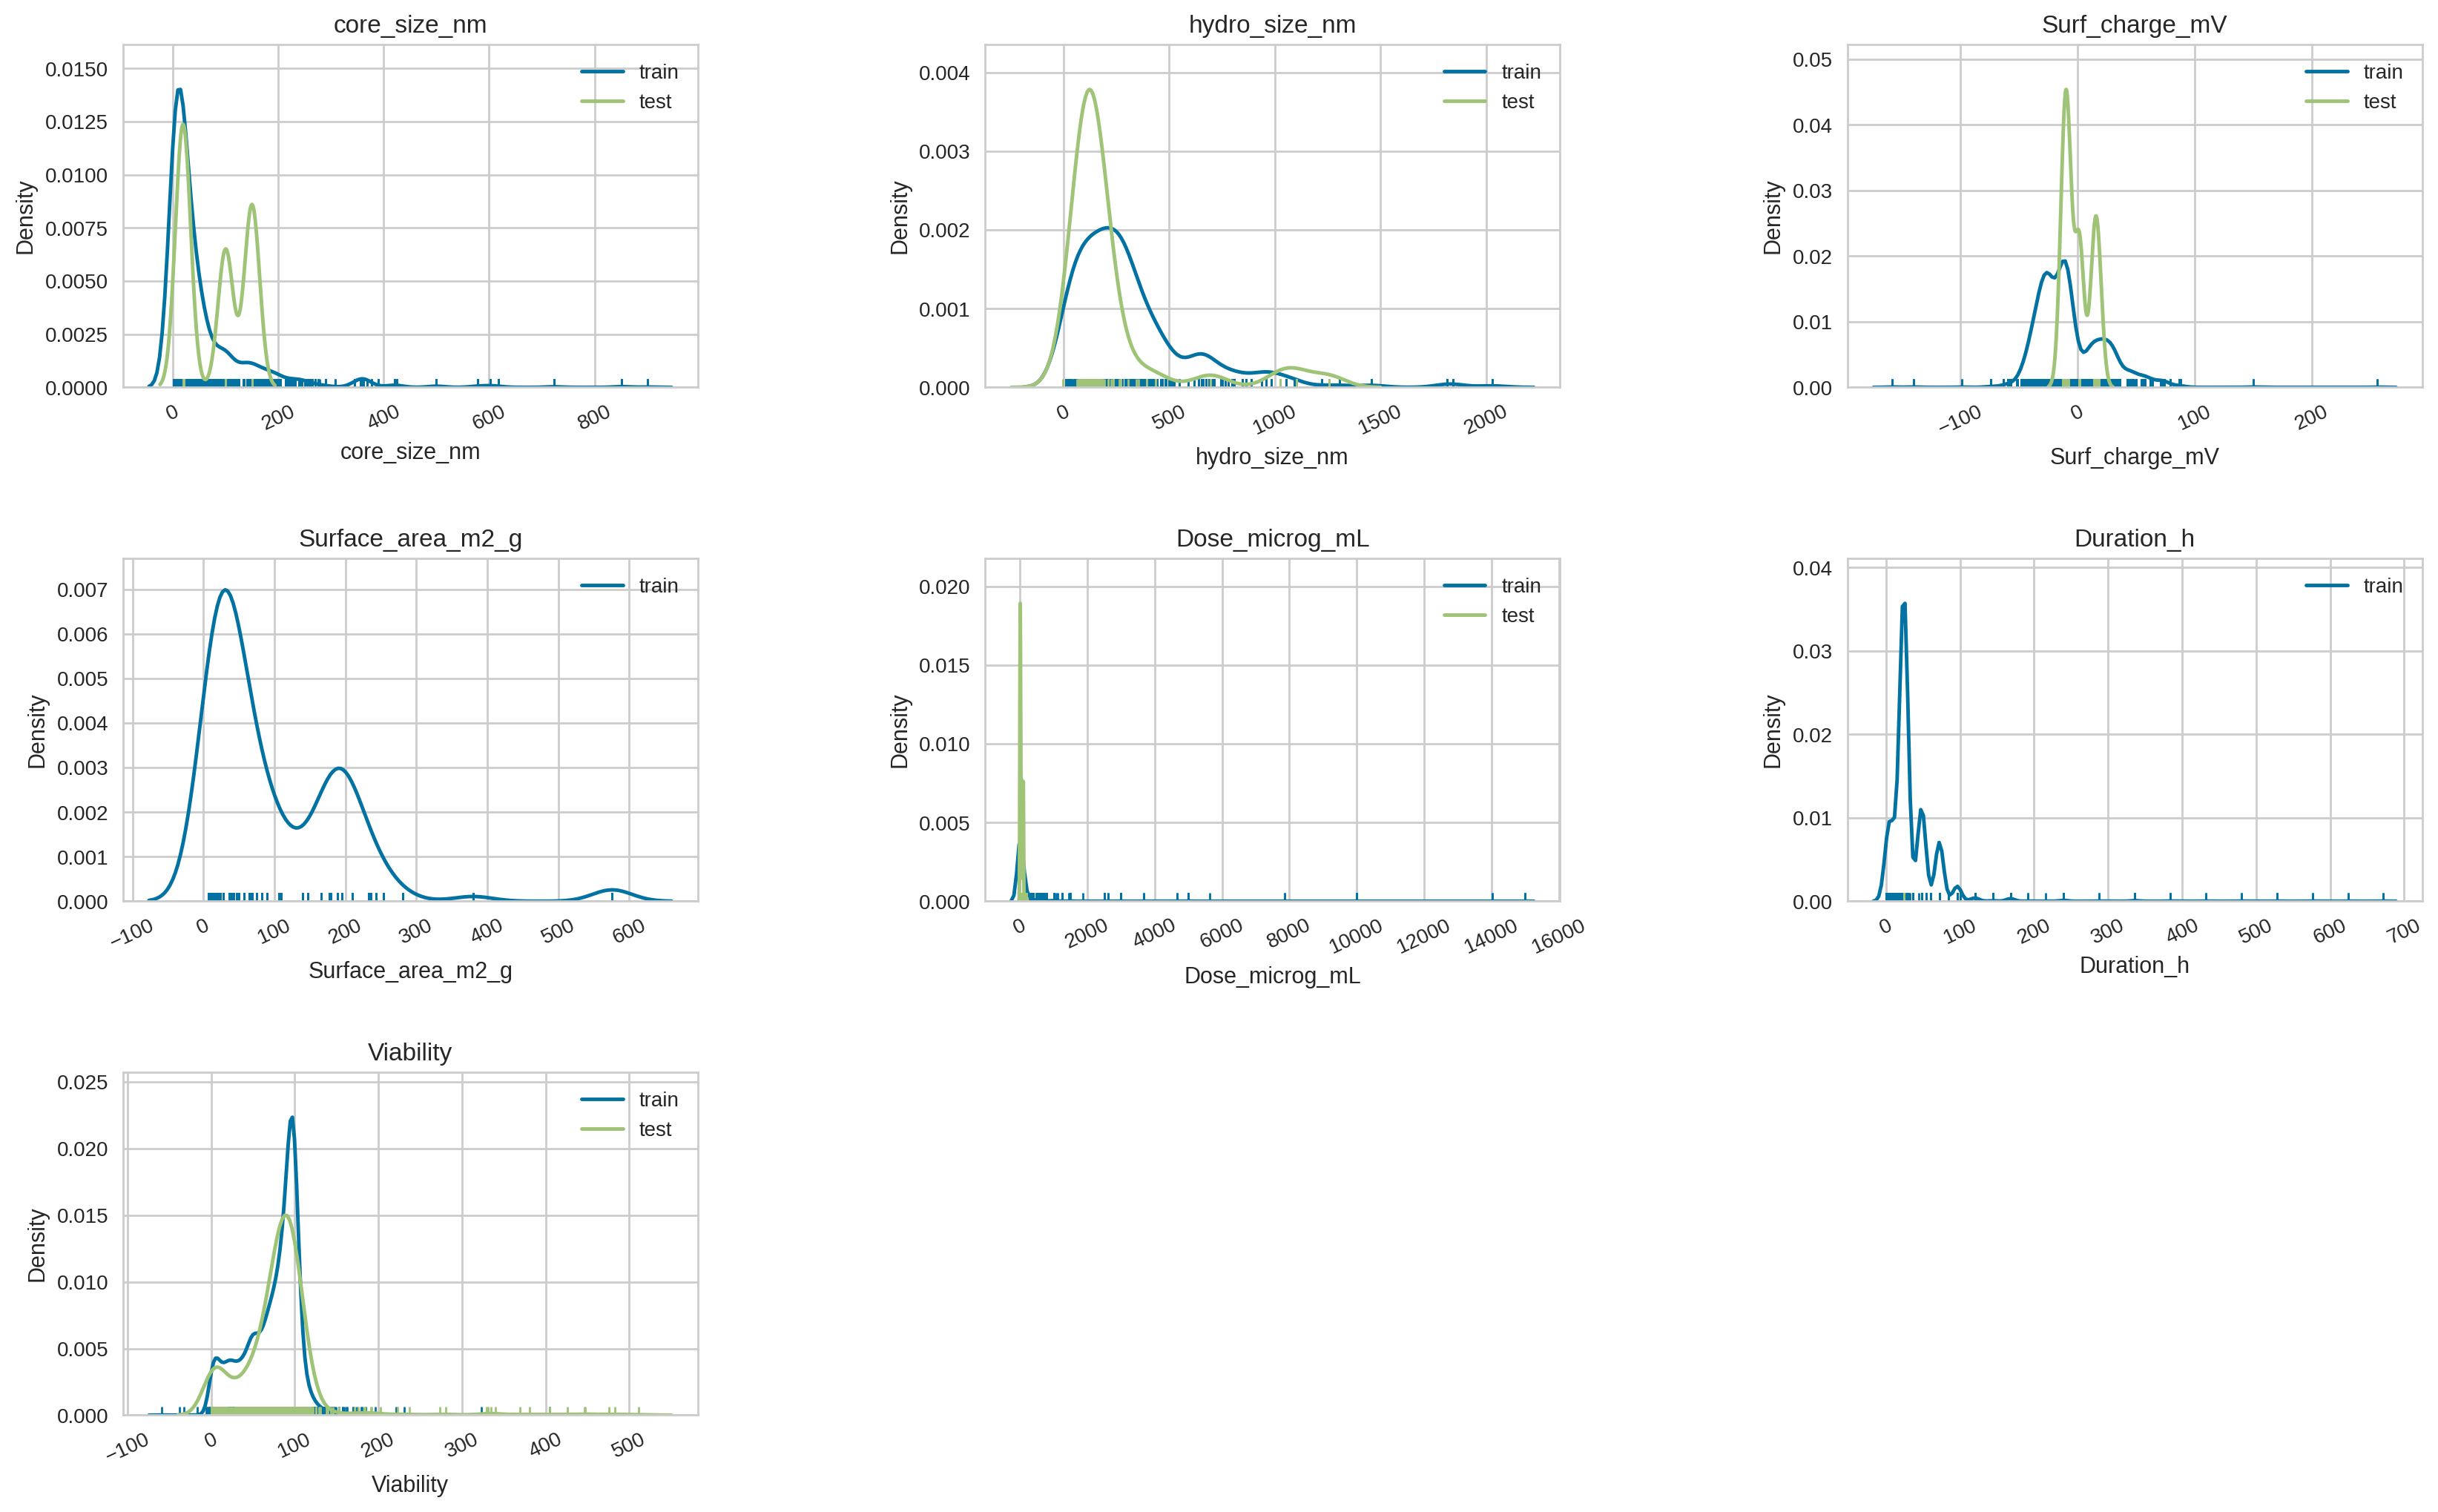

In [18]:
f.plot_distribution_train_test(data_train_df, data_asina_test_df)

In [20]:
for i in data_train_df.columns:
    print(i)
    unique_train = len(set(data_train_df[i].tolist()))
    unique_test = len(set(data_asina_test_df[i].tolist()))
    unique_intersect = len(set(data_train_df[i].tolist()).intersection(set(data_asina_test_df[i].tolist())))
    print(str(unique_train) + " - " + str(unique_test) + " - " + str(unique_intersect))

NP_type
79 - 2 - 2
Coating
145 - 4 - 2
core_size_nm
1097 - 4 - 4
hydro_size_nm
7003 - 579 - 2
Surf_charge_mV
5098 - 809 - 2
Surface_area_m2_g
8433 - 969 - 0
shape
14 - 2 - 2
Dose_microg_mL
581 - 16 - 16
Duration_h
331 - 1 - 1
Cell_name
274 - 2 - 2
Cell_species
21 - 1 - 1
cell_Organ
65 - 2 - 2
Cell_morphology
38 - 1 - 1
Cell_age
6 - 1 - 1
cell_type
3 - 1 - 1
sex
3 - 1 - 1
Assay
34 - 3 - 3
Test_indicator
18 - 2 - 1
nanomaterial_group
5 - 2 - 2
Viability
4954 - 913 - 453


### Prepare classification dataframes

In [21]:
data_classification_asina_test_df = f.convert_to_classification_dataset(data_asina_test_df.copy())

In [22]:
data_classification_asina_test_df.shape

(969, 20)

# PyCaret

### Load the universal regression model

In [92]:
final_config = load_config('output/models/universal_regression_config.cfg')

In [93]:
final_model = load_model('output/models/universal_regression_model.mdl')

Transformation Pipeline and Model Successfully Loaded


In [94]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.9462,403.1352,20.0782,0.6292,0.5419,1.0943


,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h,NP_type_Ag,NP_type_Al2O3,NP_type_Alginate,NP_type_Au,NP_type_Bi,NP_type_Bi2O3,NP_type_C60,NP_type_C70,NP_type_Carbon,NP_type_CdS,NP_type_CdSe,NP_type_CdSeS,NP_type_CdSeTe,NP_type_CdTe,NP_type_CeO2,NP_type_Chitosan,NP_type_Co,NP_type_Co3O4,NP_type_CoO,NP_type_Cr,NP_type_Cr2O3,NP_type_Cu2O,NP_type_CuO,NP_type_Dendrimer,NP_type_Diamond,NP_type_EudragitRL,NP_type_Fe2O3,NP_type_Fe3O4,NP_type_Graphite,NP_type_Hydroxyapatite,NP_type_IronOxide,NP_type_La2O3,NP_type_MWCNT,NP_type_MgO,NP_type_Mn2O3,NP_type_MnO,NP_type_Nanotubes,NP_type_Ni2O3,NP_type_NiO,NP_type_PLGA,NP_type_PTFE-PMMA,NP_type_Polystyrene,NP_type_Pt,NP_type_QD,NP_type_QDs,NP_type_SLN,NP_type_SWCNT,NP_type_Sb2O3,NP_type_SiO2,NP_type_SnO2,NP_type_Ti,NP_type_TiO2,NP_type_WO3,NP_type_ZnO,NP_type_ZrO2,shape_Cubic,shape_Hexagon,shape_Irregular,shape_Monoclinic,shape_Needle,shape_Rhombohedral,shape_Rod,shape_Sphere,shape_Star,shape_Tetragonal,shape_Wire,Cell_species_Catfish,Cell_species_Cow,Cell_species_Dog,Cell_species_Hamster,Cell_species_Human,Cell_species_Microalgae,Cell_species_Monkey,Cell_species_Mouse,Cell_species_Pig,Cell_species_Rabbit,Cell_species_Rat,Cell_species_Yeast,cell_Organ_Amniotic-membrane,cell_Organ_Aorta,cell_Organ_Ascites,cell_Organ_Bladder,cell_Organ_Blood,cell_Organ_Bone,cell_Organ_BoneMarrow,cell_Organ_Brain,cell_Organ_Breast,cell_Organ_Cerebellum,cell_Organ_Cervix,cell_Organ_Colon,cell_Organ_Connective-tissue,cell_Organ_Embryo,cell_Organ_Eye,cell_Organ_FatPad,cell_Organ_Foreskin,cell_Organ_Heart,cell_Organ_Kidney,cell_Organ_Liver,cell_Organ_Lung,cell_Organ_Lymph,cell_Organ_Nose,cell_Organ_Ovary,cell_Organ_Pancreas,cell_Organ_Peritoneal Cavity,cell_Organ_Prostate,cell_Organ_Skin,cell_Organ_Somatic Cell-hybrid,cell_Organ_Spleen,cell_Organ_Stomach,cell_Organ_Teeth,cell_Organ_Tongue,cell_Organ_Umbilical,cell_Organ_Urinary bladder,cell_Organ_axillary lymph node,Cell_morphology_Endothelial,Cell_morphology_Epidermal,Cell_morphology_Epithelial,Cell_morphology_Fibroblast,Cell_morphology_Hepatocyte,Cell_morphology_Irregular,Cell_morphology_Keratinocyte,Cell_morphology_Lymphoblast,Cell_morphology_Lymphocyte,Cell_morphology_Macrophage,Cell_morphology_Mesenchymal,Cell_morphology_Mixed,Cell_morphology_Monocyte,Cell_morphology_Monocyte/Macrophage,Cell_morphology_Myoblast,Cell_morphology_Neural,Cell_morphology_Osteoblast,Cell_morphology_Preosteoblast,Cell_morphology_Somatic,Cell_morphology_Spindle,Cell_morphology_Stem-cell,Cell_morphology_monocyte,Cell_age_Adult,Cell_age_Stem,Cell_age_Young,Cell_age_fetus,Cell_age_neonate,cell_type_cancer,sex_male,Assay_APO_BrdU_TUNEL,Assay_ATPLite,Assay_Alamar_Blue,Assay_Annexiv_V_,Assay_CCK_8,Assay_CVS,Assay_CellTiterBlue,Assay_CellTiter_Glo,Assay_Colonigenic-assay,Assay_CytoTox­One,Assay_Hemolysis,Assay_LDH,Assay_Live/Dead,Assay_Luciferase-assay,Assay_MTS,Assay_MTT,Assay_NR,Assay_Others,Assay_SRB,Assay_Trypan_Blue,Assay_Vialight,Assay_WST-1,Assay_XTT,Assay_induction-of-autophagy,Test_indicator_AlamarBlue,Test_indicator_CalceinAM,Test_indicator_Caspase_Glo,Test_indicator_CrystalViolet,Test_indicator_Dead-Cell-Protease,Test_indicator_LDHrelease,Test_indicator_TetrazoliumSalt,Test_indicator_Trypan_Blue,Test_indicator_fluorescent,Test_indicator_luciferase,Test_indicator_propidium_iodide,Test_indicator_toluylene red,Viability,Label
0,-0.589116,-0.969192,0.918720,0.276223,-0.092128,-0.850029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0

In [95]:
predict_model(final_model, data=data_asina_test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,28.8379,2614.2467,51.1297,0.0487,1.0629,5.9706


,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability,label,Label
0,Ag,None,150.0,144.04,NaN,NaN,Sphere,1.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,80.15,test,92.670851
1,Ag,None,150.0,145.09,NaN,NaN,Sphere,5.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,65.05,test,83.731536
2,Ag,None,150.0,146.40,NaN,NaN,Sphere,10.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,64.27,test,84.613203
3,Ag,None,150.0,149.02,NaN,NaN,Sphere,20.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,57.01,test,79.794617
4,Ag,None,150.0,154.27,NaN,NaN,Sphere,40.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,35.84,test,74.839596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,95.27,test,62.435467
965,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,92.97,test,62.435467
966,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,63.59,test,62.435467
967,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,84.94,test,62.435467


In [143]:
features = ['core_size_nm', 'hydro_size_nm', 'Surf_charge_mV', 'Surface_area_m2_g', 'Dose_microg_mL', 'Duration_h']

data_train_df['label'] = 'train'
data_asina_test_df['label'] = 'test'

x = pd.concat([data_train_df, data_asina_test_df])

y = x[['label']].copy()
x = x[features].copy()

In [144]:
y.dtypes

label    object
dtype: object

In [145]:
x.dtypes

core_size_nm         float64
hydro_size_nm        float64
Surf_charge_mV       float64
Surface_area_m2_g    float64
Dose_microg_mL       float64
Duration_h           float64
dtype: object

In [146]:
x['Surf_charge_mV'].isna().sum()

5576

In [147]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [148]:
x_clean = pd.DataFrame(imp_mean.fit_transform(x))
x_clean.columns=x.columns
x_clean.index=x.index

In [149]:
x_clean['Surf_charge_mV'].isna().sum()

0

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
x_clean = pd.DataFrame(StandardScaler().fit_transform(x_clean))
x_clean.columns=x.columns
x_clean.index=x.index

In [152]:
x.shape

(10021, 6)

In [153]:
y.head()

,label
0,train
1,train
2,train
3,train
4,train


In [155]:
x_clean

,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h
0,-0.613849,6.978634e-16,0.0000,-5.359219e-16,-0.151315,-0.987131
1,-0.607054,6.978634e-16,0.0000,-5.359219e-16,-0.165662,-0.286690
2,-0.597995,6.978634e-16,0.0000,-5.359219e-16,-0.163982,-0.286690
3,0.336230,6.978634e-16,0.0000,-5.359219e-16,-0.165662,-0.773953
4,-0.331090,6.978634e-16,-0.9707,-5.359219e-16,-0.115638,0.444204
...,...,...,...,...,...,...
964,-0.450784,6.978634e-16,0.0000,-5.359219e-16,0.034436,-0.286690
965,-0.450784,6.978634e-16,0.0000,-5.359219e-16,0.034436,-0.286690
966,-0.450784,6.978634e-16,0.0000,-5.359219e-16,0.034436,-0.286690
967,-0.450784,6.978634e-16,0.0000,-5.359219e-16,0.034436,-0.286690


In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_clean)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [157]:
principalDf

,principal component 1,principal component 2
0,0.124942,-0.891420
1,0.226065,-0.491753
2,0.222089,-0.487467
3,-0.253452,-0.453472
4,0.781111,0.001599
...,...,...
10016,0.151081,-0.296099
10017,0.151081,-0.296099
10018,0.151081,-0.296099
10019,0.151081,-0.296099


In [158]:
principalDf.dtypes

principal component 1    float64
principal component 2    float64
dtype: object

In [159]:
y.dtypes

label    object
dtype: object

In [160]:
principalDf = principalDf.reset_index(drop=True)
y = y.reset_index(drop=True)

In [161]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [162]:
finalDf.head()

,principal component 1,principal component 2,label
0,0.124942,-0.891420,train
1,0.226065,-0.491753,train
2,0.222089,-0.487467,train
3,-0.253452,-0.453472,train
4,0.781111,0.001599,train


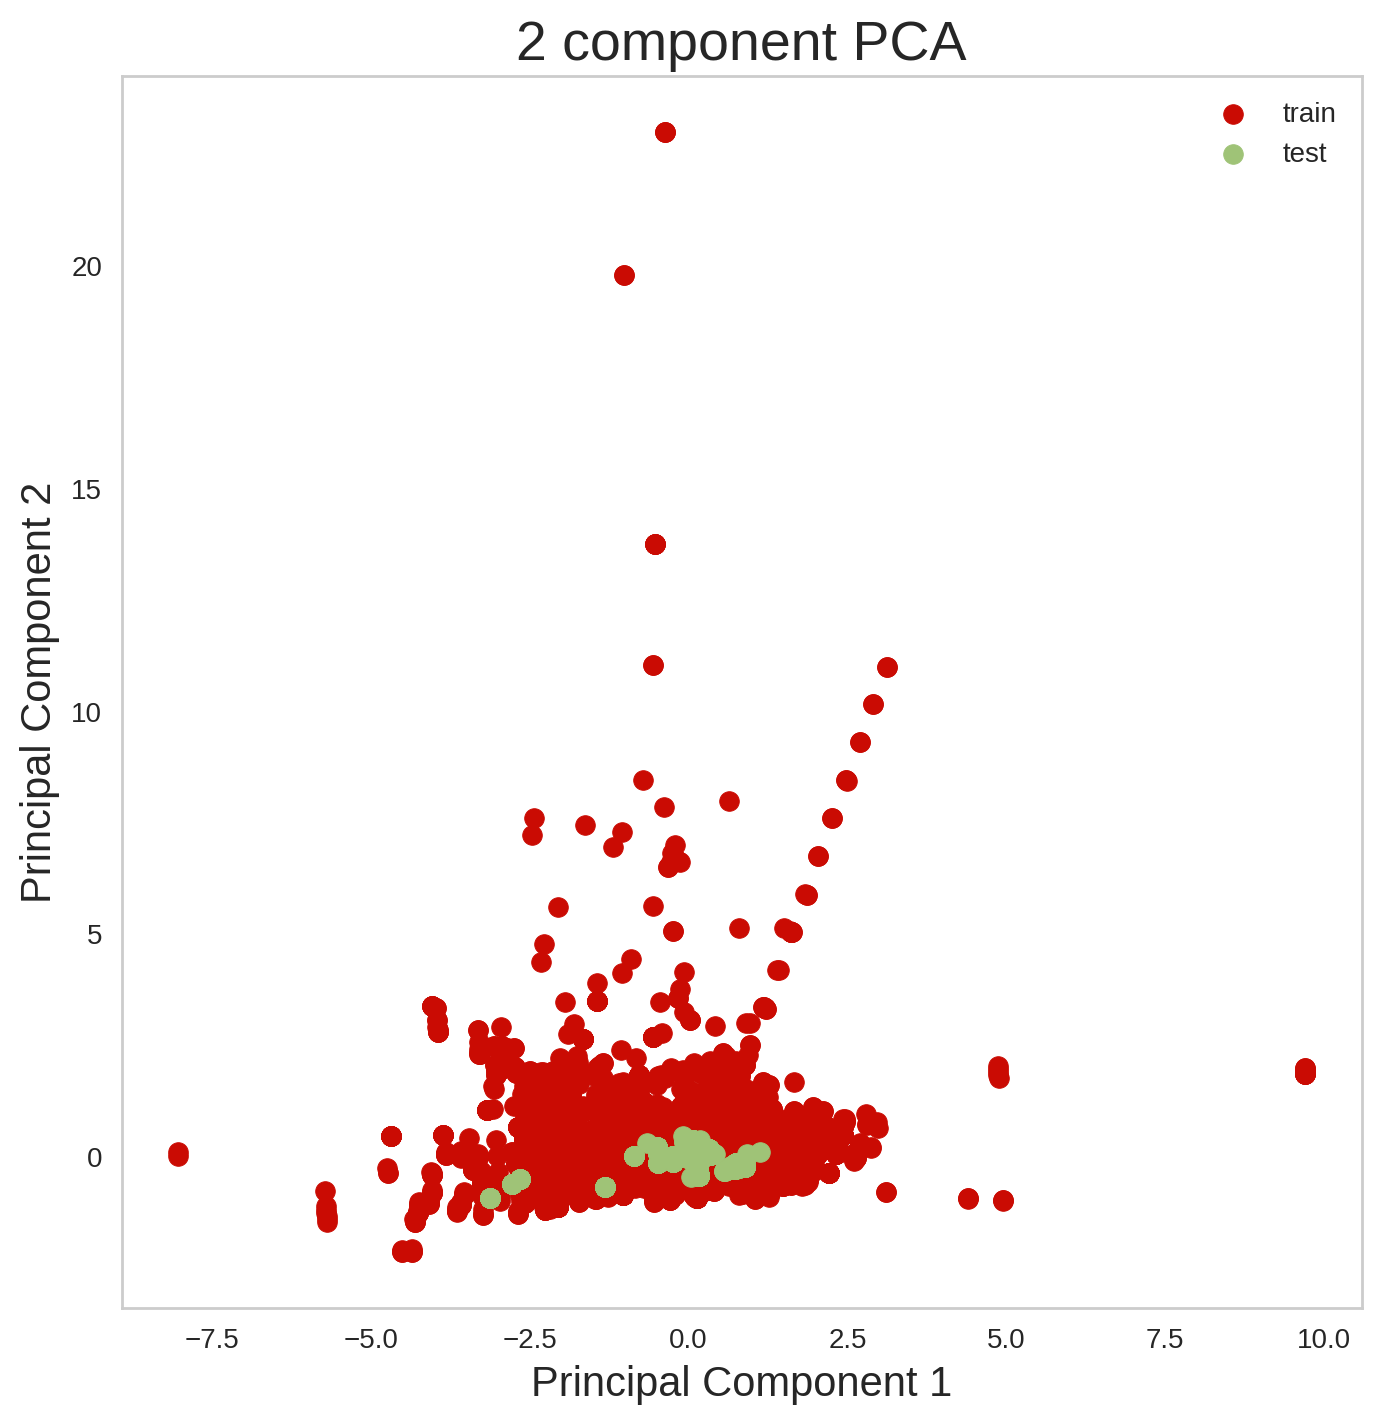

In [163]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['train', 'test']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [164]:
pca.explained_variance_ratio_

array([0.20502233, 0.17208577])